<a href="https://colab.research.google.com/github/adhiraj4ai/Machine-Learning/blob/main/9.%20Outlier%20Detection%20/%209_1_Outlier_Detection_Statistics_based_approach.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 9.1. Statistical based approach for outlier detection
Statistical Methods are also called model based methods where statistical models are used for outlier detection. This approach make an assumption of data normality. They assure the data objects are generated throuh as a statistical stochastic model.

Following are different statistical methods for outlier detection:

1. [Histogram](https://colab.research.google.com/drive/1gBZG9z3CQCAHkjymK0Ulsfvx-amTPUp1#scrollTo=7Dd8RKWOMI3s&line=1&uniqifier=1)
2. [Z-score](https://colab.research.google.com/drive/1gBZG9z3CQCAHkjymK0Ulsfvx-amTPUp1#scrollTo=P5i9al0fMMyV&line=1&uniqifier=1)
3. [Modified Z-score](https://colab.research.google.com/drive/1gBZG9z3CQCAHkjymK0Ulsfvx-amTPUp1#scrollTo=67wSzKLjWJ5I&line=6&uniqifier=1)
3. [Box Plot](https://colab.research.google.com/drive/1gBZG9z3CQCAHkjymK0Ulsfvx-amTPUp1#scrollTo=axpQBT1ILeE-&line=1&uniqifier=1)
4. [Inter Quartile Range (IQR)](https://colab.research.google.com/drive/1gBZG9z3CQCAHkjymK0Ulsfvx-amTPUp1#scrollTo=6ykldK96Lf6q&line=1&uniqifier=1)

1. **Histogram:**
    
    Histogram is the distribution plot of dataset where we can observe the distribution of data visually and see if outliers are present in data. It is a non parametric statistical model to capture outliers. Take a look at the data and plot below:

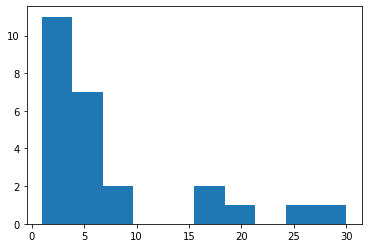

In [12]:
import numpy as np
from matplotlib import pyplot as plt

data = np.array([1, 2, 3, 3, 1, 2, 6, 3, 3, 5, 2, 6, 4, 3, 2, 7, 6, 9, 5, 4, 19, 17, 16, 25, 30])
plt.hist(data)
plt.show()

In the above graph we can observe the presence of outlier points through the distribution. Some values at 16 and beyond exits in the data.

One of the difficulties in using histograms is that it is hard to choose an appropriate bin size. On the one hand, if the bin size is set too small, many normal objects may end up in enmpty or rare bins and it the bin size is set too large, outlier objects ma inflate into some frequent bins.

2. **Z-score:**
    
    The Z-score for any observation is defined as:

    \begin{equation}
    Z = (x - \bar x) / σ
    \end{equation}

    where, $\bar x $ is the mean and $σ$ is the standard deviation and $x$ is the observation.

    It is one of the simplest statistical measure for outlier detection. In a statistical distribution, Z-score tells us how many standard deviation away a given observation is from the mean of all the observations. A X-score of 1.5 means that an observation is 1.5 S.D. away from the mean of all the observations.

In [15]:
z_score = []
for x in data:
    z = (x - data.mean())/data.std()
    z_score.append(z)

print(np.array(z_score))

[-0.83231245 -0.70144571 -0.57057897 -0.57057897 -0.83231245 -0.70144571
 -0.17797876 -0.57057897 -0.57057897 -0.3088455  -0.70144571 -0.17797876
 -0.43971224 -0.57057897 -0.70144571 -0.04711203 -0.17797876  0.21462145
 -0.3088455  -0.43971224  1.52328882  1.26155535  1.13068861  2.30848925
  2.96282293]


3. **Modified Z-Score:**
    Z-score is used when data are normally distributed and sample size is small. And, Z-score is also sensitive to extreme values. This matters because mean is one of the parameter to calculate Z-score and mean is sensitive towards extreme value. So it may not properly identify the outliers.

    So, the Z-score is modified to eliminate these limitations which has following modifications:
    * Replace mean with median; median is less sensitive towards outliers.
    * The values resulting from the difference between observation and median is multiplied by a constant in order to make it approximately equal to SD (for normally ditributed data).

    \begin{equation}
        Modified Z-score = 0.6745 * (x - median)/MAD
    \end{equation}

 It is recommended that `Modified Z-scores` with an absolute value of greater than 3.5 be labeled as potential outliers. 

In [ ]:
z_score = []
for x in data:
    z = (x - data.mean())/data.std()
    z_score.append(z)

print(np.array(z_score))

4. **Inter Quartile Range (IQR):**
    In univariate dataset, median splits data into two halves because median is the midpoint or mid location for the given daataset. Similarly, quartiles divides data into four halves at three different quartile point - 1st, 2nd and 3rd quartiles where 2nd quartiles is median again. 

    Thus, the interquartile range is the distance between 1st and 3rd quartiles. Interquartile range for univariate data can be used for outlier detection as the data point too far from the 1st and 3rd quartile are considered as outliers. 

    Steps:

    i) Compute first quartile(Q1) and third quartile(Q3) for given dataset

    ii) Calcualte the difference between Q3 and Q1. 
        IQR = Q3 - Q1
    iii) If any oversation lies beyond `Q1 - 1.5 * IQR` and `Q3 + 1.5 * IQR` then they are considered as outlier.

In [26]:
# Compute first quartile - Q1
Q1 = np.percentile(data, 25, interpolation = "midpoint")

# Compute third quartile - Q3
Q3 = np.percentile(data, 75, interpolation = "midpoint")

# Compaute IQR
IQR = Q3 - Q1
lower_bound = Q1 - IQR * 1.5
upper_bound = Q3 + IQR * 1.5

# Finding outlier
data[np.logical_or(data < lower_bound, data > upper_bound)]

array([19, 17, 16, 25, 30])

5. **Box Plot:**

 Boxplot is a graphical technique to identify outliers which utilizes the IQR value computed above. Box plot provides following information through visual graphs:
    1. Median of the data
    2. First Quartile and 3rd Quartile
    4. Inter Quartile Range
    5. Outliers

 The plot below shows outliers visually based on IQR calculated above. But the IQR here is calculated implicitly by the library.

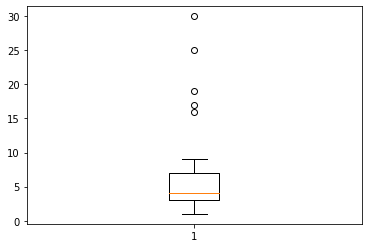

In [17]:
plt.boxplot(data)
plt.show()